<img src='imgs/random_forest.png' />

# Fraud Detection w/ Random Forest Example

### load, sample, split data

In [16]:
%%time
# 24 seconds
import pandas as pd
from sklearn.model_selection import train_test_split

#df = pd.read_csv('fraud_0.csv')
df = pd.read_csv('fraud_all.csv')

y = df['isFraud']
X = df.drop(columns = ['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

CPU times: user 20.8 s, sys: 4.47 s, total: 25.3 s
Wall time: 25.8 s


In [17]:
%%time
# 9 seconds
df.describe()

CPU times: user 7.97 s, sys: 940 ms, total: 8.91 s
Wall time: 9.19 s


,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,...,S,W,american express,discover,mastercard,visa,charge card,credit,debit,debit or credit
count,590540.000000,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.00000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,295269.500000,3.282270e+06,0.034990,7.372311e+06,135.027682,9898.734658,362.554649,153.194939,199.278328,290.74116,...,0.019690,0.744522,0.014102,0.011263,0.320414,0.651551,0.000025,0.252288,0.744976,0.000051
std,170474.358321,1.704744e+05,0.183755,4.617224e+06,239.158822,4901.170153,156.595241,11.321413,41.095456,95.91413,...,0.138934,0.436130,0.117913,0.105526,0.466636,0.476479,0.005040,0.434326,0.435875,0.007127
min,0.000000,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147634.750000,3.134635e+06,0.000000,3.027058e+06,43.300000,6019.000000,215.000000,150.000000,166.000000,205.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,295269.500000,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.000000,150.000000,226.000000,290.80000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,442904.250000,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,327.00000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,590539.000000,3.577539e+06,1.000000,1.581113e+07,31940.000000,18396.000000,600.000000,231.000000,237.000000,540.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### check memory

In [18]:
%who

MedianPruner	 X	 X_test	 X_train	 df	 optuna	 pd	 pg_url	 study	 
train_test_split	 y	 y_test	 y_train	 


In [19]:
del df, X, y, train_test_split

# Random Forest Hyperparams

In [20]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?

### induce Random Forest

In [21]:
from multiprocessing import cpu_count
n_cores = cpu_count()
n_cores

12

In [22]:
%%time
# 4 seconds

MAX_DEPTH = 4
N_TREES = 10

clf = RandomForestClassifier( max_depth=MAX_DEPTH, n_estimators=N_TREES, random_state=0, n_jobs=n_cores)
clf.fit(X_train, y_train)

CPU times: user 17.3 s, sys: 2.13 s, total: 19.4 s
Wall time: 4.77 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=12,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### feature importance

https://gist.github.com/WillKoehrsen/475f57ab3c61ea46db0833c6708f1702

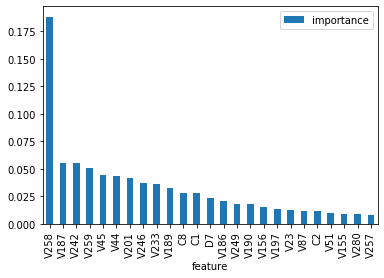

In [23]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf.feature_importances_}).sort_values('importance', ascending = False)

import matplotlib.pyplot as plt
fi.head(25).plot(x='feature', y='importance', kind='bar')
plt.show()

### test model

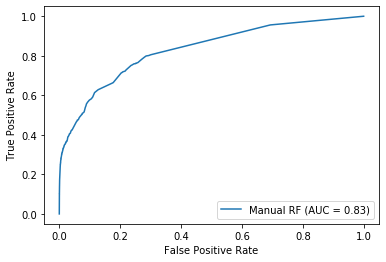

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred = [tple for tple in clf.predict(X_test)]

auc = metrics.plot_roc_curve(clf, X_test, y_test, name='Manual RF')
plt.show()  

In [20]:
auc.roc_auc

0.8302734053405972

In [21]:
metrics.average_precision_score(y_test,y_pred)

0.16152257467173192

In [22]:
metrics.roc_auc_score(y_test,y_pred)

0.57695103544808

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.57695103544808

# AutoML :: Random Forest with Optuna
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [38]:
import optuna

In [25]:
RandomForestClassifier?

### objective function

In [54]:
def rf_ojbective(trial):
    
    # Random Forest Params
    MAX_DEPTH = trial.suggest_int('MAX_DEPTH',1, 20)
    N_TREES  = trial.suggest_int('N_TREES', 5, 200)
    N_SAMPLE_SPLIT = trial.suggest_int('N_SAMPLE_SPLIT',2,20)
    
    # Induction
    clf = RandomForestClassifier(
        n_estimators      = N_TREES, 
        max_depth         = MAX_DEPTH, 
        min_samples_split = N_SAMPLE_SPLIT,
        n_jobs = n_cores,
        random_state = 0)
    clf.fit(X_train, y_train)
    
    # Test
    fpr, tpr, thresholds = metrics.roc_curve(y_test, [y_hat[1] for y_hat in clf.predict_proba(X_test)], pos_label=1)
    result = 1 - metrics.auc(fpr, tpr)
    return result

### create study backed by PostgreSQL Docker

In [55]:
# optuna.delete_study(study_name='rf_ieee_fraud_all', storage=pg_url)

In [39]:
# EXPLORE & EXPLOIT
from optuna.pruners import MedianPruner

In [40]:
#DOCKER PostgreSQL
pg_url = 'postgresql+pg8000://admin@localhost:5433/optuna'
study = optuna.load_study(
    study_name='rf_ieee_fraud_all', 
    storage=pg_url, 
    pruner=MedianPruner(n_startup_trials=50, n_warmup_steps=10, interval_steps=1))

In [63]:
%%time
# ~3 minutes
study.optimize(rf_ojbective, n_trials=100, timeout=120)

[I 2020-01-24 12:24:22,782] Finished trial#7 resulted in value: 0.14081400850860026. Current best value is 0.09386255439426106 with parameters: {'MAX_DEPTH': 20, 'N_SAMPLE_SPLIT': 8, 'N_TREES': 142}.
[I 2020-01-24 12:25:37,481] Finished trial#8 resulted in value: 0.09614199861519113. Current best value is 0.09386255439426106 with parameters: {'MAX_DEPTH': 20, 'N_SAMPLE_SPLIT': 8, 'N_TREES': 142}.
[I 2020-01-24 12:27:03,060] Finished trial#9 resulted in value: 0.11885096150999686. Current best value is 0.09386255439426106 with parameters: {'MAX_DEPTH': 20, 'N_SAMPLE_SPLIT': 8, 'N_TREES': 142}.


CPU times: user 29min 10s, sys: 12.9 s, total: 29min 23s
Wall time: 2min 46s


In [7]:
df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))
df['auc'] = 1 - df['value']
df.sort_values(by='auc', ascending=False)

,number,value,params_MAX_DEPTH,params_N_SAMPLE_SPLIT,params_N_TREES,state,auc
6,6,0.093863,20,8,142,COMPLETE,0.906137
8,8,0.096142,19,2,103,COMPLETE,0.903858
3,3,0.108577,16,19,174,COMPLETE,0.891423
9,9,0.118851,13,12,162,COMPLETE,0.881149
5,5,0.135319,9,18,196,COMPLETE,0.864681
7,7,0.140814,9,16,11,COMPLETE,0.859186
4,4,0.142062,8,15,166,COMPLETE,0.857938
2,2,0.160068,4,18,65,COMPLETE,0.839932
1,1,0.332943,1,10,6,COMPLETE,0.667057
0,0,NaN,268,13,407,RUNNING,NaN


In [8]:
df.describe()

,number,value,params_MAX_DEPTH,params_N_SAMPLE_SPLIT,params_N_TREES,auc
count,10.00000,9.000000,10.000000,10.000000,10.000000,9.000000
mean,4.50000,0.147627,36.700000,13.100000,143.200000,0.852373
std,3.02765,0.072990,81.502624,5.321863,114.617044,0.072990
min,0.00000,0.093863,1.000000,2.000000,6.000000,0.667057
25%,2.25000,0.108577,8.250000,10.500000,74.500000,0.857938
50%,4.50000,0.135319,11.000000,14.000000,152.000000,0.864681
75%,6.75000,0.142062,18.250000,17.500000,172.000000,0.891423
max,9.00000,0.332943,268.000000,19.000000,407.000000,0.906137


In [41]:
df['auc'].max()

0.906137445605739

In [42]:
df['auc'].mean()

0.8523734720917061

In [43]:
df['auc'].min()

0.6670573042804943

### visualizations

In [47]:
optuna.visualization.plot_optimization_history(study)

In [48]:
optuna.visualization.plot_slice(study, params=['N_TREES','MAX_DEPTH','N_SAMPLE_SPLIT'])

In [14]:
optuna.visualization.plot_parallel_coordinate(study, params=['N_TREES','MAX_DEPTH','N_SAMPLE_SPLIT'])

In [15]:
optuna.visualization.plot_contour(study, params=['N_TREES','MAX_DEPTH','N_SAMPLE_SPLIT'])

# AUC - without AutoML

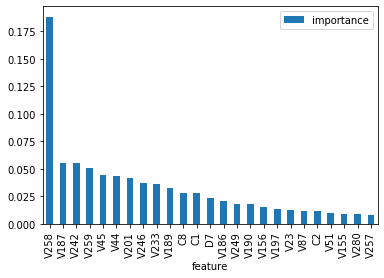

In [80]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf.feature_importances_}).sort_values('importance', ascending = False)

import matplotlib.pyplot as plt
fi.head(25).plot(x='feature', y='importance', kind='bar')
plt.show()

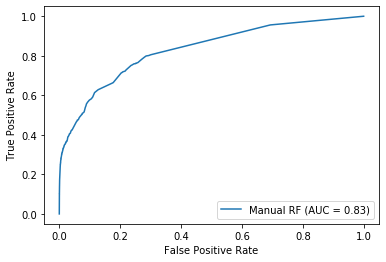

In [81]:
y_pred = [tple for tple in clf.predict(X_test)]
auc = metrics.plot_roc_curve(clf, X_test, y_test, name='Manual RF')
plt.show()  

# AUC with AutoML

In [82]:
study.best_params

{'MAX_DEPTH': 20, 'N_SAMPLE_SPLIT': 8, 'N_TREES': 142}

In [88]:
%%time
# 
aml = RandomForestClassifier(
    n_estimators      = study.best_params['N_TREES'], 
    max_depth         = study.best_params['MAX_DEPTH'], 
    min_samples_split = study.best_params['N_SAMPLE_SPLIT'],
    n_jobs = n_cores,
    random_state = 0)
aml.fit(X_train, y_train)

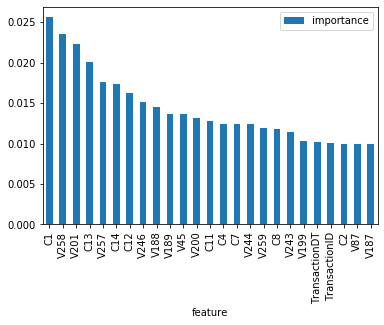

In [89]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': aml.feature_importances_}).sort_values('importance', ascending = False)

import matplotlib.pyplot as plt
fi.head(25).plot(x='feature', y='importance', kind='bar')
plt.show()

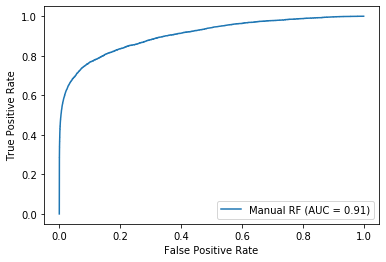

In [91]:
y_pred = [tple for tple in aml.predict(X_test)]
auc = metrics.plot_roc_curve(aml, X_test, y_test, name='Manual RF')
plt.show()  